# Numerical differentiation. Practical exercise.

In this exercise, we will use finite differences to differentiate a black box and solve an optimization problem.

#### Context
Laura does not have an analytical formula for engagement. She only has a __black box__ based on data computed by thirds. 

The black box gives the engagement level based on posting frequency $x$.

The goal is to find the optimal posting frequency that __maximizes__ engagement.

#### The function of the black box

In [3]:
#Import packages
import numpy as np
import matplotlib.pyplot as plt
from data.blackbox import f

# Make one prediction on the black box model
f(1)

81.60546875

#### Finite Differences Scheme

In [2]:
def forwardFD(x, fun, h):
    return (fun(x+h) - fun(x))/h

#### Numerical method
We choose the gradient __ascent__ for the minimization. The update of the parameter  $x$ is done by the expression:
\begin{equation*}
x_{i+1} := x_i + \alpha \frac{d \mathcal{L}}{d x}
\end{equation*}
where x is the parameter to optimize and $\alpha$ denotes the learning rate.

In [3]:
def GA(theta, dL, lr):
    theta_updated = theta + lr*dL
    return theta_updated

#### The training:

In [6]:
def training (n_epochs, lr, x_0, h):
    #we initialize the parameters
    x = x_0
    
    #evaluate the negative of the initial loss
    loss_val = -f(x_0)
    print(f"Initial loss: {loss_val}")
    
    history =[loss_val]

    #training loop
    for epoch in range(n_epochs):
        #compute the gradients.
        dL_dx = forwardFD(x, f, h)
        
        #apply gradient Ascent
        x = GA(x, dL_dx, lr)
        
        #evaluate the loss
        loss_val =-f(x)
        
        history.append(loss_val)
        #uncoment to print the loss each n iterations
        if epoch%100 == 0:
            print(f"Iteration {epoch}: loss = {loss_val}, x  = {x}")
   
    print(f"Iteration {epoch}: loss = {loss_val}, x  = {x}")
    print(f"Final x  = {x};")
    
    history_loss = np.array(history)

    #We plot the loss history
    def plot_loss(history_loss):
        x = np.arange(history_loss.shape[0])
        plt.plot(x, history_loss, color="black")
        # Labels and plot formatting
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title("Loss evolution")
        plt.grid(True)
        # Show the plot
        plt.show()
    plot_loss(history_loss)
    
    return x

##### Define training parameters and run the optimization.

Initial loss: -121.45096223302596
Iteration 0: loss = -121.45201596232769, x  = 49.99897367540353
Iteration 100: loss = -121.55812370323422, x  = 49.89598426299488
Iteration 200: loss = -121.6657137834551, x  = 49.79227810915661
Iteration 300: loss = -121.77482820487587, x  = 49.68784003844194
Iteration 400: loss = -121.88551078018281, x  = 49.582654332218915
Iteration 500: loss = -121.99780723847043, x  = 49.476704701055034
Iteration 600: loss = -122.11176533866208, x  = 49.369974255269966
Iteration 700: loss = -122.2274349914469, x  = 49.26244547350622
Iteration 800: loss = -122.34486839051362, x  = 49.15410016915089
Iteration 900: loss = -122.46412015394299, x  = 49.04491945442816
Iteration 1000: loss = -122.58524747671919, x  = 48.93488370196008
Iteration 1100: loss = -122.70831029542501, x  = 48.823972503575014
Iteration 1200: loss = -122.83337146630855, x  = 48.71216462611869
Iteration 1300: loss = -122.96049695804507, x  = 48.59943796399692
Iteration 1400: loss = -123.0897560606

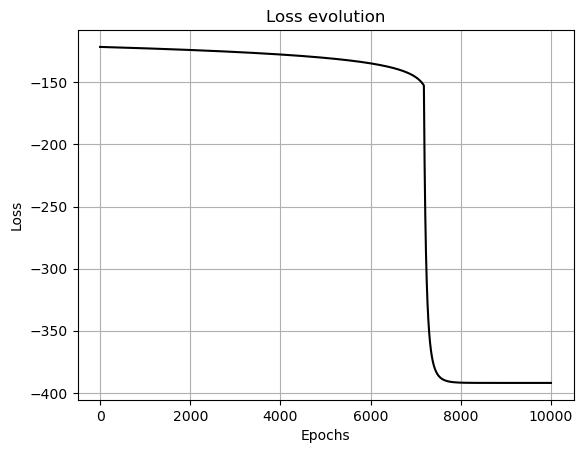

In [11]:
x_0 = 50.
h = 0.01

number_epochs = 10000
lr = 0.001

x = training(number_epochs, lr, x_0, h=h)